In [1]:
from preprocess.preprocess import *
import PARAMETERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from confusion_matrix_pretty_print import print_confusion_matrix

%matplotlib inline

In [2]:
PARAMETERS.LBP_METHOD = 'riu2'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 1
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = False
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = False

PARAMETERS.DATASET = 'STARE'

pd.DataFrame({k: getattr(PARAMETERS, k) for k in VALID_PARAMETERS.keys()}, index=['Parameters']).head()

,LBP_METHOD,METHOD,INTERPOLATION_ALGORITHM,BALANCE,N_SCALES,GRAY_INTENSITY,X2SCALE
Parameters,riu2,get_pyramid_dataset,lanczos,False,1,True,False


In [3]:
from create_db import main

# riu with r > 2 freezes the process
for lbp_method in ['default', 'riu2', 'nriuniform', 'var']:
    PARAMETERS.LBP_METHOD = lbp_method
    for r in range(2, 5):
        PARAMETERS.RADIUS = r
        PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
        main()

In [4]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for r in range(2, 5):
    db_path = f'../DB/{PARAMETERS.DATASET}/extra_features/radius/{r}'
    for filename in Path(db_path).glob('train_train_*'):   
        file_extension = \
            str(filename).replace('train_train_', '').split('/')[-1].replace('.pkl', '')
        properties = file_extension.replace(
            'get_pyramid_dataset', 'get-pyramid-dataset').replace(
            'get_datasets_by_scale', 'get-dataset-by-scale').split('_')
        lbp_method = properties[0]
        df_train_temp = pd.read_pickle(filename, compression='gzip')
        df_test_temp = pd.read_pickle(str(filename).replace('train_train', 'train_test'), compression='gzip')
        df_train_temp = df_train_temp.drop(['Original', 'label'], axis=1)
        df_test_temp = df_test_temp.drop(['Original', 'label'], axis=1)
        df_train_temp.columns = [f'1:1_{lbp_method}_{r}']
        df_test_temp.columns = [f'1:1_{lbp_method}_{r}']
        df_train = pd.concat([df_train, df_train_temp], axis=1)
        df_test = pd.concat([df_test, df_test_temp], axis=1)

In [5]:
df_train

,1:1_var_2,1:1_nriuniform_2,1:1_default_2,1:1_riu2_2,1:1_var_3,1:1_nriuniform_3,1:1_default_3,1:1_riu2_3,1:1_var_4,1:1_nriuniform_4,1:1_default_4,1:1_riu2_4
0,46,120,1,8,181,20,1,12,170,240,1,16
1,150,120,1,8,197,20,1,12,48,240,1,16
2,253,120,1,8,93,20,1,12,6,240,1,16
3,62,120,1,8,35,20,1,12,162,240,1,16
4,66,120,1,8,56,252,0,11,131,208,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
226537,214,128,254,8,248,32,254,12,245,0,254,16
226538,218,128,254,8,20,32,254,12,231,0,254,16
226539,255,128,254,8,41,32,254,12,208,0,254,16
226540,9,128,254,8,93,32,254,12,179,0,254,16


## Cálculo con la escala original a diferentes radios

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.316264 seconds.
You can set `force_col_wise=true` to remove the overhead.


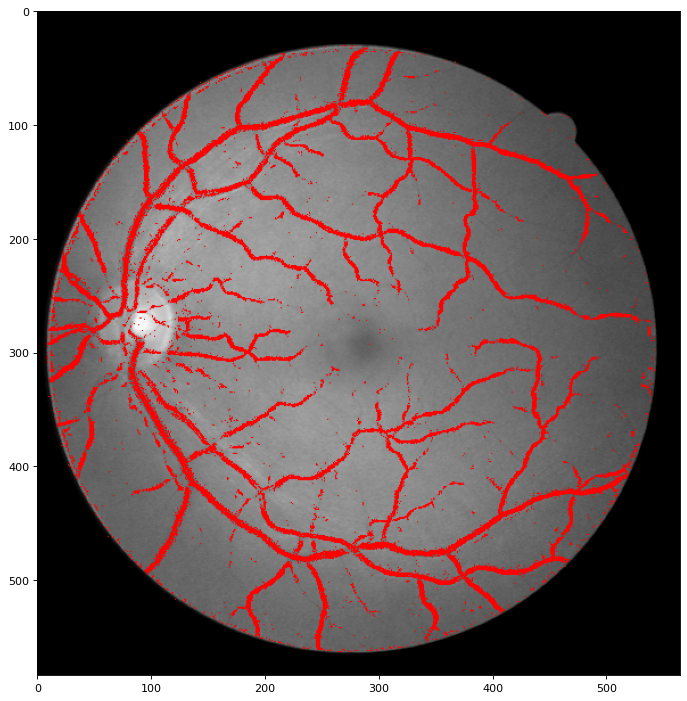

Accuracy score: 0.9252084270499822

F1 score: 0.6911536095563926

Confusion matrix:

     t/p      0     1 
        0 1146748 40797 
        1 61122 114040 
Sensivity: 0.6510544524497323
Specificity: 0.96564593341726


(0.925, 0.691, 1146748, 40797, 61122, 114040)

In [6]:
from main import main

PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 1
PARAMETERS.X2SCALE = False
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = True

main(lgb='Num', all_lbp=True, plot_once=True, extra_features={'train': df_train, 'test': df_test})

## Cálculo con radio 1 a diferentes escalas

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


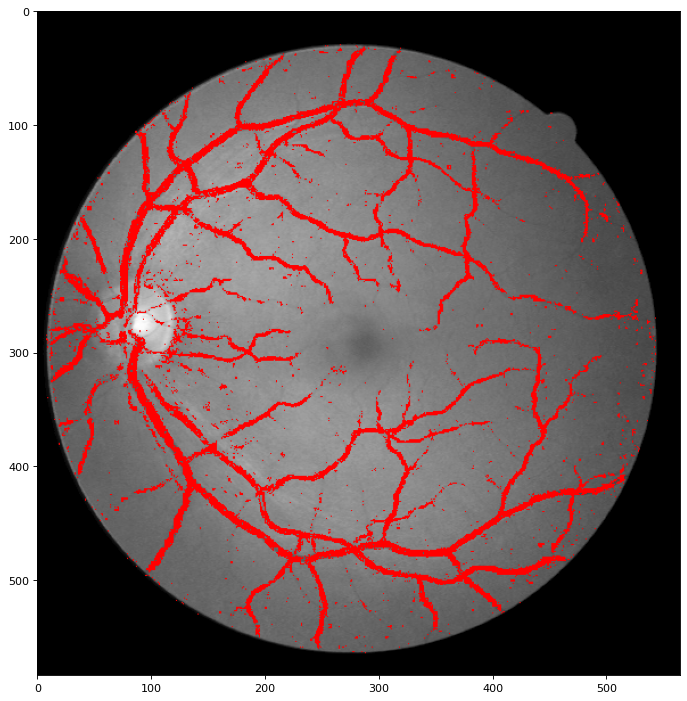

Accuracy score: 0.9250572573561301

F1 score: 0.6960701159174443

Confusion matrix:

     t/p      0     1 
        0 1143637 43908 
        1 58217 116945 
Sensivity: 0.6676390998047522
Specificity: 0.9630262432160466


(0.925, 0.696, 1143637, 43908, 58217, 116945)

In [7]:
PARAMETERS.N_SCALES = 5
PARAMETERS.X2SCALE = True
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
main(lgb='Num', all_lbp=True, plot_once=True)

## Información conjunta de diferentes escalas y radios

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


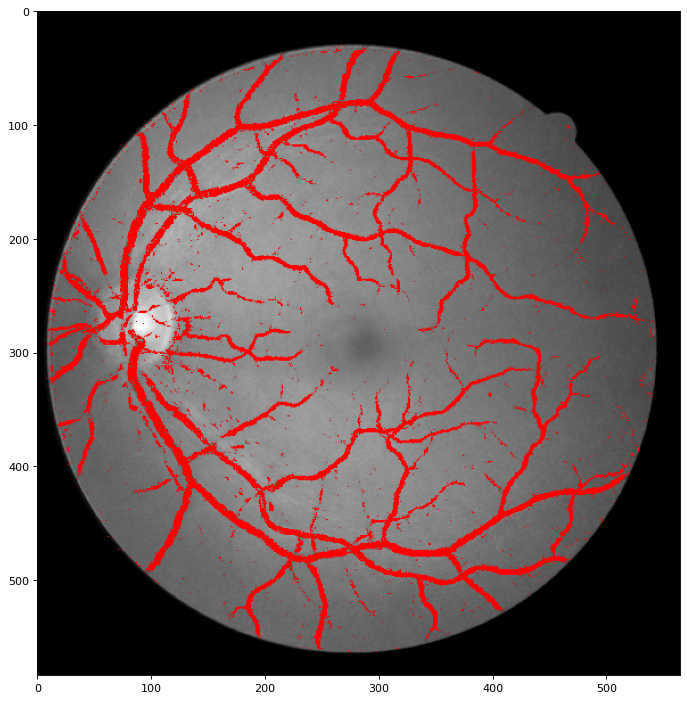

Accuracy score: 0.9326142743818003

F1 score: 0.7302910414225167

Confusion matrix:

     t/p      0     1 
        0 1146560 40985 
        1 50842 124320 
Sensivity: 0.7097429807835033
Specificity: 0.9654876236268941


(0.933, 0.73, 1146560, 40985, 50842, 124320)

In [8]:
main(lgb='Num', all_lbp=True, plot_once=True, extra_features={'train': df_train, 'test': df_test})